In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import adjustText as aT
import matplotlib.patheffects as PathEffects

In [2]:
plt.rcParams["font.family"] = 'NanumGothic'
df = gpd.read_file("SIG/TL_SCCO_SIG.shp", encoding='euc-kr')
df.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.082 1952633.250, 964875.590 1..."


In [3]:
df['si'] = df['SIG_KOR_NM'].str[0:3]
df.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,si
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",종로구
1,11140,Jung-gu,중구,"POLYGON ((957890.386 1952616.746, 957909.908 1...",중구
2,11170,Yongsan-gu,용산구,"POLYGON ((953115.761 1950834.084, 953114.206 1...",용산구
3,11200,Seongdong-gu,성동구,"POLYGON ((959681.109 1952649.605, 959842.412 1...",성동구
4,11215,Gwangjin-gu,광진구,"POLYGON ((964825.082 1952633.250, 964875.590 1...",광진구


In [4]:
서부 = ['28110','28140','28177','28185','28200','28237','28245','28260','28710', '41190', '41570']
중부 = ['광명', '과천', '안양', '시흥', '군포', '의왕', '안산', '수원', '화성', '오산']
남부 = ['평택', '안성']
동부 = ['성남', '하남', '광주', '용인', '이천', '여주', '양평']
북부 = ['연천', '파주', '동두천', '포천', '양주', '의정부', '고양', '구리', '남양주', '가평']

In [5]:
gg = pd.DataFrame()
for i in 동부:
    temp=df[df['SIG_KOR_NM'].str.contains(i)]
    temp['state'] = '동부'
    gg = gg.append(temp)

C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [6]:
for i in 서부:
    temp=df[df['SIG_CD'].str.contains(i)]
    temp['state'] = '서부'
    gg = gg.append(temp)

C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
for i in 남부:
    temp=df[df['SIG_KOR_NM'].str.contains(i)]
    temp['state'] = '남부'
    gg = gg.append(temp)  

C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
for i in 북부:
    temp=df[df['SIG_KOR_NM'].str.contains(i)]
    temp['state'] = '북부'
    gg = gg.append(temp)

C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
for i in 중부:
    temp=df[df['SIG_KOR_NM'].str.contains(i)]
    temp['state'] = '중부'
    gg = gg.append(temp)    
    

C:\Users\mws10\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
gg["rep"] = gg["geometry"].representative_point()
gg_points = gg.copy()
gg_points.set_geometry("rep", inplace = True)

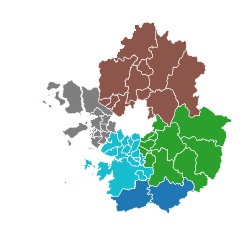

In [11]:
ax = gg.plot(edgecolor="w",column="state", linewidth =0.5)
texts = []

"""
for x, y, label in zip(gg_points.geometry.x, gg_points.geometry.y, gg_points["SIG_KOR_NM"]):
    a = plt.text(x, y, label, fontsize = 3)
    texts.append(a) #, bbox=dict(facecolor="w", alpha=0.2, linewidth = 0)))
aT.adjust_text(texts, force_points=0, force_text=1, expand_points=(0,0), expand_text=(1,1))
"""
ax.set_axis_off()
plt.savefig("경기지부.png", dpi=600)


